In [1]:
heartsa = [str(i) + 'H' for i in range(7,15)]
clubsa = [str(i) + 'C' for i in range(7,15)]
spadesa = [str(i) + 'S' for i in range(7,15)]
diamondsa = [str(i) + 'D' for i in range(7,15)]

allcardsa = heartsa + clubsa + spadesa + diamondsa
valuesa = [0, 0, 0, 10, 2, 3, 4, 11, 0, 0, 0, 10, 2, 3, 4, 11, 0, 0, 0, 10, 2, 3, 4, 11, 0, 0, 0, 10, 2, 3, 4, 11]

pointvalues = dict(zip(allcardsa, valuesa))

In [2]:
import pandas as pd
import numpy as np
# ipython autotime
%load_ext autotime

# ipython_memory_usage
import ipython_memory_usage 
%ipython_memory_usage_start  
from pprint import pprint as pp

time: 113 ms
In [2] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 71.21 MiB


In [5]:
# df1 = pd.read_pickle('2256000_2256009')
# df2 = pd.read_pickle('2268010_2268200')
# df3 = pd.read_pickle('2268200_2268600')
# df4 = pd.read_pickle('2268600_2270000')
# df5 = pd.read_pickle('2270000_2272000')
# df6 = pd.read_pickle('2272000_2274000')
# df7 = pd.read_pickle('2274000_2277000')
# df8 = pd.read_pickle('2277000_2280000')
# df9 = pd.read_pickle('2280000_2282000')
# df10 = pd.read_pickle('2282000_2284000')
# df11 = pd.read_pickle('2284000_2285000')
# df12 = pd.read_pickle('2285000_2287000')
# df13 = pd.read_pickle('2287000_2290000')
# df14 = pd.read_pickle('2290000_2293000')
# df15 = pd.read_pickle('2293000_2296000')
# df16 = pd.read_pickle('2296000_2330000')

time: 672 ms
In [5] used 156.8438 MiB RAM in 0.78s, peaked 0.00 MiB above current, total RAM usage 228.74 MiB


In [6]:
dfhandnew = pd.read_pickle('2400000_2400100')

time: 3.95 ms
In [6] used 0.3125 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 229.05 MiB


In [7]:
dfa = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16])

time: 193 ms
In [7] used 34.5156 MiB RAM in 0.29s, peaked 0.00 MiB above current, total RAM usage 263.57 MiB


In [ ]:
#dfa.to_pickle('basedf')

In [3]:
# card types
hearts = [str(i) + 'H' for i in range(7, 11)] + ['13H'] + ['14H']
spades = [str(i) + 'S' for i in range(7, 11)] + ['13S'] + ['14S']
clubs = [str(i) + 'C' for i in range(7, 11)] + ['13C'] + ['14C']
# Trump
trump = [str(i) + 'D' for i in range(7, 15)] + ['11' + i for i in ['H', 'S', 'C']] + ['12' + i for i in ['H', 'S', 'C']]

In [4]:
fail = hearts + spades + clubs

time: 1.28 ms
In [4] used 0.1055 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 71.37 MiB


In [5]:
points = [0, 0, 0, 10, 4, 11]
pointstrump = [0, 0, 0, 10, 2, 3, 4, 11, 2, 2, 2, 3, 3, 3]
trumprank = [1, 2, 3, 5, 7, 11, 4, 6, 8, 9, 10, 12, 13, 14]
failrank = [1, 2, 3, 5, 4, 6]

time: 2.07 ms
In [5] used -0.0117 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 71.36 MiB


In [6]:
faildic = dict(zip(fail, zip(points * 4, failrank * 4)))
trumpdic = dict(zip(trump, zip(pointstrump, trumprank)))


time: 1.45 ms
In [6] used 0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 71.38 MiB


In [11]:
df = dfa.copy()

NameError: name 'dfa' is not defined

In [7]:
df = pd.read_pickle('basedf')

time: 438 ms
In [7] used 196.2891 MiB RAM in 0.54s, peaked 0.00 MiB above current, total RAM usage 267.66 MiB


In [8]:
df['cards'] = df[df.columns[1:7]].apply(lambda x: ','.join(x.astype(str)).split(','), axis=1)
df['trump'] = df['cards'].apply(lambda x: [i for i in x if i in trumpdic.keys()])


time: 20.9 s
In [8] used 62.3789 MiB RAM in 21.05s, peaked 67.99 MiB above current, total RAM usage 330.04 MiB


In [9]:
df['trumpcount'] = df['trump'].apply(lambda x: len(x))

time: 53.3 ms
In [9] used 5.0195 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 335.06 MiB


In [10]:
df['fail'] = df['cards'].apply(lambda x: [i for i in x if i in faildic.keys()])


time: 285 ms
In [10] used 5.2188 MiB RAM in 0.39s, peaked 6.96 MiB above current, total RAM usage 340.28 MiB


In [11]:
df['failcount'] = df['fail'].apply(lambda x: len(x))

time: 45.1 ms
In [11] used 4.9453 MiB RAM in 0.15s, peaked 0.00 MiB above current, total RAM usage 345.23 MiB


In [12]:
df['heldpoints'] = df['cards'].apply(lambda x: sum([pointvalues[i] for i in x]))

time: 144 ms
In [12] used 0.9766 MiB RAM in 0.24s, peaked 0.25 MiB above current, total RAM usage 346.20 MiB


In [13]:
df['outcome'] = df['score'].apply(lambda x: 'win' if x > 0 else 'lose')

time: 26.2 ms
In [13] used -10.5273 MiB RAM in 0.13s, peaked 10.54 MiB above current, total RAM usage 335.68 MiB


In [14]:
df['uniqueid'] = df[['handid', 'name']].astype(str).apply('-'.join,1)


time: 864 ms
In [14] used 8.2891 MiB RAM in 0.97s, peaked 58.68 MiB above current, total RAM usage 343.96 MiB


In [15]:
df

,name,1,2,3,4,5,6,score,handid,picker,...,ace_suit,leaster,cards,trump,trumpcount,fail,failcount,heldpoints,outcome,uniqueid
0,jturba,8H,12C,14H,13D,9C,13C,2,2256000,picker,...,,,"[8H, 12C, 14H, 13D, 9C, 13C]","[12C, 13D]",2,"[8H, 14H, 9C, 13C]",4,22,win,2256000-jturba
1,Jungle jim,9S,8D,13H,11C,12S,9H,-1,2256000,no,...,,,"[9S, 8D, 13H, 11C, 12S, 9H]","[8D, 11C, 12S]",3,"[9S, 13H, 9H]",3,9,lose,2256000-Jungle jim
2,jcardo,14S,7D,7H,10C,13S,8C,-1,2256000,no,...,,,"[14S, 7D, 7H, 10C, 13S, 8C]",[7D],1,"[14S, 7H, 10C, 13S, 8C]",5,25,lose,2256000-jcardo
3,robyinko,11D,12H,11S,9D,11H,12D,1,2256000,partner,...,,,"[11D, 12H, 11S, 9D, 11H, 12D]","[11D, 12H, 11S, 9D, 11H, 12D]",6,[],0,12,win,2256000-robyinko
4,shipdog,7S,10D,10H,14D,14C,7C,-1,2256000,no,...,,,"[7S, 10D, 10H, 14D, 14C, 7C]","[10D, 14D]",2,"[7S, 10H, 14C, 7C]",4,42,lose,2256000-shipdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,rboegel,8D,14S,14D,7C,11C,8H,-2,2304498,no,...,,,"[8D, 14S, 14D, 7C, 11C, 8H]","[8D, 14D, 11C]",3,"[14S, 7C, 8H]",3,24,lose,2304498-rboegel
1,gmabear,12H,9S,11D,9C,7H,9H,2,2304498,partner,...,,,"[12H, 9S, 11D, 9C, 7H, 9H]","[12H, 11D]",2,"[9S, 9C, 7H, 9H]",4,5,win,2304498-gmabear
2,bighuhnit,12C,13S,12D,14C,8C,8S,-2,2304498,no,...,,,"[12C, 13S, 12D, 14C, 8C, 8S]","[12C, 12D]",2,"[13S, 14C, 8C, 8S]",4,21,lose,2304498-bighuhnit
3,Barbara Dorn,7D,13D,12S,13C,10C,10D,4,2304498,picker,...,,,"[7D, 13D, 12S, 13C, 10C, 10D]","[7D, 13D, 12S, 10D]",4,"[13C, 10C]",2,31,win,2304498-Barbara Dorn


time: 298 ms
In [15] used 41.5938 MiB RAM in 0.40s, peaked 0.00 MiB above current, total RAM usage 385.56 MiB


In [16]:
df.columns

Index([         'name',               1,               2,               3,
                     4,               5,               6,         'score',
              'handid',        'picker',         'alone',      'position',
               'lead0',         'lead1',         'lead2',         'lead3',
               'lead4',         'lead5', 'pick_position',        'rd0pos',
              'rd1pos',        'rd2pos',        'rd3pos',        'rd4pos',
              'rd5pos',       'blind_1',       'blind_2',         'bury1',
               'bury2',      'call_ace',      'ace_suit',       'leaster',
               'cards',         'trump',    'trumpcount',          'fail',
           'failcount',    'heldpoints',       'outcome',      'uniqueid'],
      dtype='object')

time: 3.5 ms
In [16] used 0.0273 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 385.59 MiB


In [17]:
df

,name,1,2,3,4,5,6,score,handid,picker,...,ace_suit,leaster,cards,trump,trumpcount,fail,failcount,heldpoints,outcome,uniqueid
0,jturba,8H,12C,14H,13D,9C,13C,2,2256000,picker,...,,,"[8H, 12C, 14H, 13D, 9C, 13C]","[12C, 13D]",2,"[8H, 14H, 9C, 13C]",4,22,win,2256000-jturba
1,Jungle jim,9S,8D,13H,11C,12S,9H,-1,2256000,no,...,,,"[9S, 8D, 13H, 11C, 12S, 9H]","[8D, 11C, 12S]",3,"[9S, 13H, 9H]",3,9,lose,2256000-Jungle jim
2,jcardo,14S,7D,7H,10C,13S,8C,-1,2256000,no,...,,,"[14S, 7D, 7H, 10C, 13S, 8C]",[7D],1,"[14S, 7H, 10C, 13S, 8C]",5,25,lose,2256000-jcardo
3,robyinko,11D,12H,11S,9D,11H,12D,1,2256000,partner,...,,,"[11D, 12H, 11S, 9D, 11H, 12D]","[11D, 12H, 11S, 9D, 11H, 12D]",6,[],0,12,win,2256000-robyinko
4,shipdog,7S,10D,10H,14D,14C,7C,-1,2256000,no,...,,,"[7S, 10D, 10H, 14D, 14C, 7C]","[10D, 14D]",2,"[7S, 10H, 14C, 7C]",4,42,lose,2256000-shipdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,rboegel,8D,14S,14D,7C,11C,8H,-2,2304498,no,...,,,"[8D, 14S, 14D, 7C, 11C, 8H]","[8D, 14D, 11C]",3,"[14S, 7C, 8H]",3,24,lose,2304498-rboegel
1,gmabear,12H,9S,11D,9C,7H,9H,2,2304498,partner,...,,,"[12H, 9S, 11D, 9C, 7H, 9H]","[12H, 11D]",2,"[9S, 9C, 7H, 9H]",4,5,win,2304498-gmabear
2,bighuhnit,12C,13S,12D,14C,8C,8S,-2,2304498,no,...,,,"[12C, 13S, 12D, 14C, 8C, 8S]","[12C, 12D]",2,"[13S, 14C, 8C, 8S]",4,21,lose,2304498-bighuhnit
3,Barbara Dorn,7D,13D,12S,13C,10C,10D,4,2304498,picker,...,,,"[7D, 13D, 12S, 13C, 10C, 10D]","[7D, 13D, 12S, 10D]",4,"[13C, 10C]",2,31,win,2304498-Barbara Dorn


time: 164 ms
In [17] used 0.1758 MiB RAM in 0.27s, peaked 0.00 MiB above current, total RAM usage 385.76 MiB


In [18]:
dfa = df[['uniqueid', 1, 2, 3, 4, 5, 6, 'score', 'picker', 'pick_position', 'trumpcount', 'heldpoints', 'outcome']]

time: 18.2 ms
In [18] used 10.7227 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 396.48 MiB


In [19]:
dfa

,uniqueid,1,2,3,4,5,6,score,picker,pick_position,trumpcount,heldpoints,outcome
0,2256000-jturba,8H,12C,14H,13D,9C,13C,2,picker,1,2,22,win
1,2256000-Jungle jim,9S,8D,13H,11C,12S,9H,-1,no,2,3,9,lose
2,2256000-jcardo,14S,7D,7H,10C,13S,8C,-1,no,3,1,25,lose
3,2256000-robyinko,11D,12H,11S,9D,11H,12D,1,partner,4,6,12,win
4,2256000-shipdog,7S,10D,10H,14D,14C,7C,-1,no,0,2,42,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2304498-rboegel,8D,14S,14D,7C,11C,8H,-2,no,0,3,24,lose
1,2304498-gmabear,12H,9S,11D,9C,7H,9H,2,partner,0,2,5,win
2,2304498-bighuhnit,12C,13S,12D,14C,8C,8S,-2,no,1,2,21,lose
3,2304498-Barbara Dorn,7D,13D,12S,13C,10C,10D,4,picker,2,4,31,win


time: 17.9 ms
In [19] used 0.0391 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 396.52 MiB


In [20]:
pickerhands = dfa['picker'] == 'picker'
dfa[pickerhands]

,uniqueid,1,2,3,4,5,6,score,picker,pick_position,trumpcount,heldpoints,outcome
0,2256000-jturba,8H,12C,14H,13D,9C,13C,2,picker,1,2,22,win
3,2256002-kibittzer,7D,12S,9D,12C,11H,13H,12,picker,4,5,12,win
3,2256004-Grandpaken78,12C,7D,14D,11S,13D,11H,6,picker,0,6,22,win
3,2256005-officials Jim,13D,7D,11H,7C,12D,8D,2,picker,2,5,9,win
0,2256006-tvretired,13D,8H,11D,12C,12S,10H,16,picker,2,4,22,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2304491-rboegel,9D,7S,12H,12C,8D,14D,2,picker,0,5,17,win
4,2304492-Denman,8S,11C,13S,9D,12S,13D,2,picker,2,4,13,win
3,2304493-Kris Mazur,7H,10D,12C,7S,12H,13S,2,picker,1,3,20,win
4,2304496-Denman,7C,9D,12C,11H,11C,14C,2,picker,1,4,18,win


time: 31.5 ms
In [20] used 0.0234 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 396.55 MiB


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from pipeline_modules import average_metrics_pipeline
from pipeline_modules import classification_reports_pipeline
from pipeline_modules import roc_curve_pipeline

time: 917 ms
In [21] used 31.1367 MiB RAM in 1.02s, peaked 14.34 MiB above current, total RAM usage 427.68 MiB


In [22]:
df = dfa.copy()

time: 21.3 ms
In [22] used 15.4844 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 443.17 MiB


In [23]:
df['outcome'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

time: 62.2 ms
In [23] used 14.9414 MiB RAM in 0.17s, peaked 0.14 MiB above current, total RAM usage 458.11 MiB


In [24]:
pickerdf = (df['picker'] == 'picker')

time: 9.76 ms
In [24] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 458.11 MiB


In [25]:
dfm = df[pickerdf]

time: 14 ms
In [25] used 6.4141 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 464.53 MiB


In [26]:
dfm.drop(['picker'], axis=1, inplace=True)

time: 9.35 ms
In [26] used 1.6602 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 466.19 MiB


In [27]:
dfm.columns

Index([     'uniqueid',               1,               2,               3,
                     4,               5,               6,         'score',
       'pick_position',    'trumpcount',    'heldpoints',       'outcome'],
      dtype='object')

time: 5.09 ms
In [27] used 0.0078 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 466.20 MiB


In [28]:
dfmx = dfm[['uniqueid',               1,               2,               3,
                     4,               5,               6,         'score',
       'pick_position',    'trumpcount',    'heldpoints']]

time: 6.19 ms
In [28] used 0.9648 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 467.16 MiB


In [29]:
dfmy = dfm['outcome']

time: 1.27 ms
In [29] used 0.0234 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 467.18 MiB


0    1
3    1
3    1
3    1
0    1
    ..
0    1
4    1
3    1
4    1
3    1
Name: outcome, Length: 31152, dtype: int64

time: 4.71 ms
In [113] used 0.0156 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 1076.56 MiB


In [30]:
dfmx = pd.get_dummies(dfmx, columns=[1, 2, 3, 4, 5, 6,])

time: 46.2 ms
In [30] used -4.0742 MiB RAM in 0.15s, peaked 7.63 MiB above current, total RAM usage 463.11 MiB


In [31]:
dfmx

,uniqueid,score,pick_position,trumpcount,heldpoints,1_10C,1_10D,1_10H,1_10S,1_11C,...,6_7H,6_7S,6_8C,6_8D,6_8H,6_8S,6_9C,6_9D,6_9H,6_9S
0,2256000-jturba,2,1,2,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2256002-kibittzer,12,4,5,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2256004-Grandpaken78,6,0,6,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2256005-officials Jim,2,2,5,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0,2256006-tvretired,16,2,4,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2304491-rboegel,2,0,5,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2304492-Denman,2,2,4,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2304493-Kris Mazur,2,1,3,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2304496-Denman,2,1,4,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 24.8 ms
In [31] used -0.1211 MiB RAM in 0.13s, peaked 0.12 MiB above current, total RAM usage 462.99 MiB


In [32]:
dfma = pd.concat([dfmx, dfmy], axis=1)

time: 13 ms
In [32] used 1.7695 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 464.76 MiB


,uniqueid,score,pick_position,trumpcount,heldpoints,1_10C,1_10D,1_10H,1_10S,1_11C,...,6_7S,6_8C,6_8D,6_8H,6_8S,6_9C,6_9D,6_9H,6_9S,outcome
0,2256000-jturba,2,1,2,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2256002-kibittzer,12,4,5,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2256004-Grandpaken78,6,0,6,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2256005-officials Jim,2,2,5,9,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
0,2256006-tvretired,16,2,4,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2304491-rboegel,2,0,5,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2304492-Denman,2,2,4,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2304493-Kris Mazur,2,1,3,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2304496-Denman,2,1,4,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


time: 102 ms
In [118] used -729.5508 MiB RAM in 0.21s, peaked 729.55 MiB above current, total RAM usage 832.83 MiB


In [33]:
X = dfma.iloc[:,2:-1]
y = dfma.iloc[:,-1]

time: 9.62 ms
In [33] used 11.4336 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 476.19 MiB


In [139]:
X.columns

Index(['pick_position', 'trumpcount', 'heldpoints', '1_10C', '1_10D', '1_10H',
       '1_10S', '1_11C', '1_11D', '1_11H',
       ...
       '6_7H', '6_7S', '6_8C', '6_8D', '6_8H', '6_8S', '6_9C', '6_9D', '6_9H',
       '6_9S'],
      dtype='object', length=195)

time: 3.97 ms
In [139] used 17.0703 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 96.43 MiB


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

time: 28.7 ms
In [34] used 5.0156 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 481.21 MiB


In [126]:
def make_heatmap(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    conf_matrix = confusion_matrix(y_test, y_pred, normalize="all")
    sns.heatmap((conf_matrix*100), annot=True, square=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("{} Confusion Matrix".format(model_name));

time: 1.96 ms
In [126] used 0.0195 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 758.00 MiB


In [87]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, np.array(y_train).ravel())
y_pred = knn.predict(X_test)
print("Training set: ", knn.score(X_train, y_train))
print("Test set: ", knn.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.7844388266923478
Test set:  0.7424169475204622
              precision    recall  f1-score   support

           0       0.45      0.19      0.27      1544
           1       0.78      0.92      0.84      4687

    accuracy                           0.74      6231
   macro avg       0.62      0.56      0.56      6231
weighted avg       0.70      0.74      0.70      6231

time: 1min 13s
In [87] used 137.5195 MiB RAM in 73.57s, peaked 41.21 MiB above current, total RAM usage 535.21 MiB


In [129]:
confusion_matrix(y_test, y_pred)

array([[ 301, 1243],
       [ 362, 4325]])

time: 9.44 ms
In [129] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 767.97 MiB


In [88]:
X_smote, y_smote = SMOTE(random_state=42).fit_sample(X_train, y_train)
knn.fit(X_smote, np.array(y_smote).ravel())
y_pred = knn.predict(X_test)
print("Training set: ", knn.score(X_smote, y_smote))
print("Test set: ", knn.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.5494291506615451
Test set:  0.3020381961161932
              precision    recall  f1-score   support

           0       0.26      0.99      0.41      1544
           1       0.97      0.07      0.14      4687

    accuracy                           0.30      6231
   macro avg       0.62      0.53      0.28      6231
weighted avg       0.80      0.30      0.21      6231

time: 1min 43s
In [88] used 20.6328 MiB RAM in 103.18s, peaked 185.39 MiB above current, total RAM usage 555.84 MiB


In [132]:
confusion_matrix(y_test, y_pred)

array([[1534,   10],
       [4339,  348]])

time: 7.64 ms
In [132] used -5.7305 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 824.68 MiB


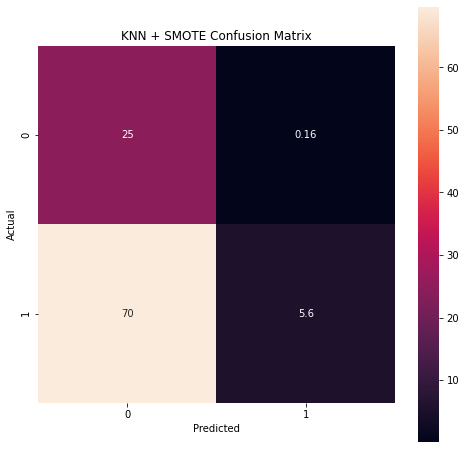

time: 249 ms
In [133] used -16.4102 MiB RAM in 0.35s, peaked 18.97 MiB above current, total RAM usage 808.27 MiB


In [133]:
make_heatmap(y_test, y_pred, "KNN + SMOTE")

In [135]:
confusion_matrix(y_test, y_pred)

array([[ 984,  560],
       [1952, 2735]])

time: 31.8 ms
In [135] used 0.8555 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 471.41 MiB


In [89]:
X_adasyn, y_adasyn = ADASYN(sampling_strategy="minority", random_state=42).fit_sample(X_train, y_train)
knn.fit(X_adasyn, np.array(y_adasyn).ravel())
y_pred = knn.predict(X_test)
print("Training set: ", knn.score(X_adasyn, y_adasyn))
print("Test set: ", knn.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.53969019670901
Test set:  0.2917669715936447
              precision    recall  f1-score   support

           0       0.26      0.99      0.41      1544
           1       0.96      0.06      0.11      4687

    accuracy                           0.29      6231
   macro avg       0.61      0.53      0.26      6231
weighted avg       0.79      0.29      0.19      6231

time: 1min 47s
In [89] used 1.8047 MiB RAM in 107.56s, peaked 177.50 MiB above current, total RAM usage 557.64 MiB


In [137]:
confusion_matrix(y_test, y_pred)

array([[1533,   11],
       [4402,  285]])

time: 15.3 ms
In [137] used 0.0352 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 483.62 MiB


In [96]:
log_reg_base = LogisticRegression(max_iter=5000)
log_reg_base.fit(X_train, np.array(y_train).ravel())
y_pred = log_reg_base.predict(X_test)
print("Training set: ", log_reg_base.score(X_train, y_train))
print("Test set: ", log_reg_base.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.7799446250150476
Test set:  0.7782057454662173
              precision    recall  f1-score   support

           0       0.61      0.29      0.39      1544
           1       0.80      0.94      0.86      4687

    accuracy                           0.78      6231
   macro avg       0.71      0.62      0.63      6231
weighted avg       0.75      0.78      0.75      6231

time: 2.58 s
In [96] used 37.5273 MiB RAM in 2.68s, peaked 0.00 MiB above current, total RAM usage 675.80 MiB


In [139]:
X_smote, y_smote = SMOTE(random_state=42).fit_sample(X_train, y_train)
log_reg.fit(X_smote, np.array(y_smote).ravel())
y_pred = log_reg.predict(X_test)
print("Training set: ", log_reg.score(X_smote, y_smote))
print("Test set: ", log_reg.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.8535798122065728
Test set:  0.7783662333493822
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      1544
           1       0.80      0.94      0.86      4687

    accuracy                           0.78      6231
   macro avg       0.70      0.62      0.63      6231
weighted avg       0.75      0.78      0.75      6231

time: 6.52 s
In [139] used 1.1523 MiB RAM in 6.63s, peaked 128.64 MiB above current, total RAM usage 594.34 MiB


In [136]:
X_ROS, y_ROS = RandomOverSampler(random_state=42).fit_sample(X_train, y_train)
log_reg_ros.fit(X_ROS, np.array(y_ROS).ravel())
y_pred = log_reg_ros.predict(X_test)
print("Training set: ", log_reg_ros.score(X_ROS, y_ROS))
print("Test set: ", log_reg_ros.score(X_test, y_test))
print(classification_report(y_test, y_pred))

NameError: name 'log_reg_ros' is not defined

In [141]:
XGBoost = XGBClassifier(n_estimators=30000,
                        num_class=2,
                        max_depth=3,
                        objective="binary:logistic", 
                        learning_rate=.1, 
                        subsample=1, 
                        min_child_weight=1,
                        colsample_bytree=.8
                        )

time: 6.27 ms
In [141] used 0.1953 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 541.17 MiB


In [142]:

# defining and instantiating other models
models = {"KNN": KNeighborsClassifier(n_neighbors=10),
          "Logistic Reg": LogisticRegression(max_iter=5000), 
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "BernoulliNB": BernoulliNB(),
          
         }
#"XGBoost": XGBoost

time: 7.67 ms
In [142] used 0.3164 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 541.48 MiB


In [143]:
for model_name, model in models.items():
    average_metrics_pipeline(X_train, y_train, model_name, model, SMOTE(random_state=42))
    print(" ")

KNN :
Accuracy: 0.29713891272533494, Variance: 5.137745412675263e-06
Precision: 0.8012149683165987, Variance: 0.00014260321428900626
Recall: 0.29713891272533494, Variance: 5.137745412675263e-06
F1 Score: 0.19650741442721406, Variance: 2.1888532594902687e-05
 
Logistic Reg :
Accuracy: 0.7745276439269655, Variance: 8.805950008920915e-06
Precision: 0.7483915554742808, Variance: 1.9248170290597903e-05
Recall: 0.7745276439269655, Variance: 8.805950008920915e-06
F1 Score: 0.7451716193551425, Variance: 1.754776640982938e-05
 
Decision Tree :
Accuracy: 0.6679911725545818, Variance: 3.298632347100781e-05
Precision: 0.6865262746936958, Variance: 1.3349849287672204e-05
Recall: 0.6679911725545818, Variance: 3.298632347100781e-05
F1 Score: 0.67615751853676, Variance: 2.0291814746605166e-05
 
Random Forest :
Accuracy: 0.7346016862787399, Variance: 3.968542598710199e-05
Precision: 0.7264078381019271, Variance: 3.169987431736091e-05
Recall: 0.7346016862787399, Variance: 3.968542598710199e-05
F1 Score:

In [144]:
for model_name, model in models.items():
    average_metrics_pipeline(X_train, y_train, model_name, model, RandomOverSampler(random_state=42))
    print(" ")

KNN :
Accuracy: 0.5947995108922273, Variance: 3.8251022472075196e-05
Precision: 0.7027419796112657, Variance: 2.615016939033035e-05
Recall: 0.5947995108922273, Variance: 3.8251022472075196e-05
F1 Score: 0.6223509459071835, Variance: 3.2848869991505345e-05
 
Logistic Reg :
Accuracy: 0.6874123655074372, Variance: 2.5389217162652427e-05
Precision: 0.760357769199643, Variance: 1.150901863747731e-05
Recall: 0.6874123655074372, Variance: 2.5389217162652427e-05
F1 Score: 0.707017814766944, Variance: 2.040403792309157e-05
 
Decision Tree :
Accuracy: 0.6909035372570359, Variance: 3.903841258662738e-05
Precision: 0.6947843869560673, Variance: 1.0461032927321648e-05
Recall: 0.6909035372570359, Variance: 3.903841258662738e-05
F1 Score: 0.6927486677867727, Variance: 2.181970357590007e-05
 
Random Forest :
Accuracy: 0.756229724486461, Variance: 1.9983696764617592e-05
Precision: 0.731923342032294, Variance: 1.8411060095329423e-05
Recall: 0.756229724486461, Variance: 1.9983696764617592e-05
F1 Score: 0

In [145]:
for model_name, model in models.items():
    average_metrics_pipeline(X_train, y_train, model_name, model, ADASYN(random_state=42, sampling_strategy="minority"))
    print(" ")

KNN :
Accuracy: 0.292484250504322, Variance: 3.2962063138361537e-07
Precision: 0.8003083426730846, Variance: 0.00010419080194624101
Recall: 0.292484250504322, Variance: 3.2962063138361537e-07
F1 Score: 0.18779485398249932, Variance: 1.1990163778925526e-06
 
Logistic Reg :
Accuracy: 0.7749289038866197, Variance: 7.260847693075193e-06
Precision: 0.748925538701635, Variance: 1.6095353990380673e-05
Recall: 0.7749289038866197, Variance: 7.260847693075193e-06
F1 Score: 0.7454049893044571, Variance: 1.547508561950104e-05
 
Decision Tree :
Accuracy: 0.6657441183904844, Variance: 4.0986884039474956e-05
Precision: 0.6899585219938921, Variance: 3.772886060392062e-05
Recall: 0.6657441183904844, Variance: 4.0986884039474956e-05
F1 Score: 0.676042566836533, Variance: 3.781765571320897e-05
 
Random Forest :
Accuracy: 0.7307491414854516, Variance: 2.1705629178383382e-06
Precision: 0.7210689472478967, Variance: 1.3017980951594411e-05
Recall: 0.7307491414854516, Variance: 2.1705629178383382e-06
F1 Score

In [146]:
for model_name, model in models.items():
    classification_reports_pipeline(X_train, y_train, model_name, model, RandomOverSampler(random_state=42))
    print(" ")

KNN               precision    recall  f1-score   support

           0       0.31      0.61      0.41      1200
           1       0.82      0.57      0.68      3785

    accuracy                           0.58      4985
   macro avg       0.57      0.59      0.54      4985
weighted avg       0.70      0.58      0.61      4985

 
Logistic Reg               precision    recall  f1-score   support

           0       0.40      0.70      0.51      1200
           1       0.87      0.67      0.76      3785

    accuracy                           0.68      4985
   macro avg       0.64      0.68      0.63      4985
weighted avg       0.76      0.68      0.70      4985

 
Decision Tree               precision    recall  f1-score   support

           0       0.37      0.43      0.40      1200
           1       0.81      0.77      0.79      3785

    accuracy                           0.69      4985
   macro avg       0.59      0.60      0.59      4985
weighted avg       0.70      0.69      

In [147]:
for model_name, model in models.items():
    classification_reports_pipeline(X_train, y_train, model_name, model, ADASYN(random_state=42, sampling_strategy="minority"))
    print(" ")

KNN               precision    recall  f1-score   support

           0       0.25      0.99      0.40      1200
           1       0.97      0.06      0.12      3785

    accuracy                           0.29      4985
   macro avg       0.61      0.53      0.26      4985
weighted avg       0.80      0.29      0.19      4985

 
Logistic Reg               precision    recall  f1-score   support

           0       0.54      0.27      0.36      1200
           1       0.80      0.93      0.86      3785

    accuracy                           0.77      4985
   macro avg       0.67      0.60      0.61      4985
weighted avg       0.74      0.77      0.74      4985

 
Decision Tree               precision    recall  f1-score   support

           0       0.35      0.44      0.39      1200
           1       0.81      0.73      0.77      3785

    accuracy                           0.66      4985
   macro avg       0.58      0.59      0.58      4985
weighted avg       0.70      0.66      

In [148]:
for model_name, model in models.items():
    classification_reports_pipeline(X_train, y_train, model_name, model, SMOTE(random_state=42))
    print(" ")

KNN               precision    recall  f1-score   support

           0       0.25      0.99      0.40      1200
           1       0.96      0.07      0.13      3785

    accuracy                           0.29      4985
   macro avg       0.61      0.53      0.27      4985
weighted avg       0.79      0.29      0.19      4985

 
Logistic Reg               precision    recall  f1-score   support

           0       0.54      0.27      0.36      1200
           1       0.80      0.93      0.86      3785

    accuracy                           0.77      4985
   macro avg       0.67      0.60      0.61      4985
weighted avg       0.74      0.77      0.74      4985

 
Decision Tree               precision    recall  f1-score   support

           0       0.34      0.44      0.39      1200
           1       0.80      0.73      0.77      3785

    accuracy                           0.66      4985
   macro avg       0.57      0.59      0.58      4985
weighted avg       0.69      0.66      

In [151]:

models = {"KNN": KNeighborsClassifier(n_neighbors=10),
          "Logistic Reg": LogisticRegression(max_iter=5000), 
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "BernoulliNB": BernoulliNB()
         }

time: 1.56 ms
In [151] used -1.6875 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 468.04 MiB


In [153]:
for model_name, model in models.items():
    roc_curve_pipeline(X_train, y_train, model_name, model, ADASYN(random_state=42, sampling_strategy="minority"))
    print(" ")

IndexError: tuple index out of range

In [74]:
newdf = pd.read_pickle('new_hands_df')
newdf

,uniqueid,score,pick_position,trumpcount,heldpoints,1_10C,1_10D,1_10H,1_10S,1_11C,...,6_7S,6_8C,6_8D,6_8H,6_8S,6_9C,6_9D,6_9H,6_9S,outcome
0,2400001-RecordHolder37,16,2,5,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2400002-TSG Jerry,8,2,5,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2400003-Dave Frederick,2,3,5,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2400004-Shawn Theune,2,3,5,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2400005-TSG Dan,8,1,4,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,2400795-vtreague,2,0,4,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
694,2400796-jerryklein1341,2,3,5,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
695,2400797-eugcindy,2,0,3,23,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
696,2400798-drdistilledjd,-8,4,5,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


time: 27.7 ms
In [74] used 0.1406 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 391.52 MiB


In [36]:
newX = newdf.iloc[:,2:-1]
newy = newdf.iloc[:,-1]

time: 2.05 ms
In [36] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 481.09 MiB


In [37]:
log_reg = LogisticRegression(max_iter=5000)
X_adasyn, y_adasyn = ADASYN(sampling_strategy="minority", random_state=42).fit_sample(X_train, y_train)
log_reg.fit(X_adasyn, np.array(y_adasyn).ravel())
y_pred = log_reg.predict(X_test)
print("Training set: ", log_reg.score(X_adasyn, y_adasyn))
print("Test set: ", log_reg.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Training set:  0.8529506351503457
Test set:  0.7783662333493822
              precision    recall  f1-score   support

           0       0.61      0.30      0.40      1544
           1       0.80      0.94      0.86      4687

    accuracy                           0.78      6231
   macro avg       0.71      0.62      0.63      6231
weighted avg       0.75      0.78      0.75      6231

time: 19.5 s
In [37] used 190.8164 MiB RAM in 19.56s, peaked 13.72 MiB above current, total RAM usage 671.90 MiB


In [42]:
import pickle
from joblib import dump

time: 1.58 ms
In [42] used 0.5273 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 581.23 MiB


In [43]:
dump(log_reg, 'log_reg_mod.joblib')

['log_reg_mod.joblib']

time: 5.12 ms
In [43] used 0.0156 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 572.48 MiB


In [57]:
predslog_reg = log_reg.predict(newX)

time: 9.54 ms
In [57] used 2.6367 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 297.85 MiB


In [65]:
len(predslog_reg)

698

time: 4.78 ms
In [65] used -0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 391.06 MiB


In [90]:
predsknn = knn.predict(newX)

time: 1.56 s
In [90] used 8.4766 MiB RAM in 1.66s, peaked 0.00 MiB above current, total RAM usage 566.12 MiB


In [91]:
len(predsknn)

698

time: 2.69 ms
In [91] used 0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 566.21 MiB


In [ ]:
inp_columns = [1, 2, 3, 4, 5, 6, 'pick_position', 'trumpcount', 'heldpoints']

In [44]:
newx

NameError: name 'newx' is not defined

In [76]:
predslog_reg

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

time: 3.79 ms
In [76] used 0.0938 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 392.54 MiB


In [79]:
newyar = np.array(newy)

time: 1.5 ms
In [79] used 0.2031 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 397.18 MiB


In [93]:
logf = pd.DataFrame({'y_actual': newyar, 'y_log_reg': predslog_reg, 'y_knn': predsknn})

time: 2.85 ms
In [93] used 0.0117 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 566.39 MiB


In [97]:
logf['hand_number'] = logf.index

time: 2.1 ms
In [97] used -43.0469 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 549.99 MiB


In [99]:
mask = (logf['y_actual'] == 0)

time: 1.85 ms
In [99] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 550.54 MiB


In [125]:
logf['score'] = logf.apply(lambda x: 2 if x['y_actual'] == x['y_log_reg'] == 1 else -4 if x['y_actual'] == 0 and x['y_log_reg'] == 1 else 0, axis=1)

time: 27.4 ms
In [125] used 0.0000 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 556.49 MiB


In [126]:
logf['score_pen'] = logf.apply(lambda x: 2 if x['y_actual'] == x['y_log_reg'] == 1 else -4 if x['y_actual'] == 0 and x['y_log_reg'] == 1 else -1, axis=1)

time: 25.6 ms
In [126] used 0.0078 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 556.50 MiB


In [128]:
logf['score_pen'].sum()

430

time: 3.74 ms
In [128] used 0.0000 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 556.50 MiB


In [135]:
logf['score'].sum()

512

time: 3.85 ms
In [135] used -1.7070 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 471.95 MiB


In [120]:
logf['knn_score'] = logf.apply(lambda x: 2 if x['y_actual'] == x['y_knn'] == 1 else -4 if x['y_actual'] == 0 and x['y_knn'] == 1 else 0, axis=1)

time: 33.7 ms
In [120] used 0.0000 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 555.05 MiB


In [122]:
logf['knn_score_pen'] = logf.apply(lambda x: 2 if x['y_actual'] == x['y_knn'] == 1 else -4 if x['y_actual'] == 0 and x['y_knn'] == 1 else -0.5, axis=1)

time: 31.9 ms
In [122] used 0.0195 MiB RAM in 0.14s, peaked 0.00 MiB above current, total RAM usage 554.98 MiB


In [124]:
logf['knn_score_pen'].sum()

-295.0

time: 3.07 ms
In [124] used 0.0039 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 555.00 MiB


In [129]:
logf['knn_score'].sum()

42

time: 3.17 ms
In [129] used 0.1523 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 556.65 MiB


In [132]:
logf['score_cum'] = logf['score'].cumsum()
logf['score_cum_pen'] = logf['score_pen'].cumsum()
logf['knn_cum'] = logf['knn_score'].cumsum()
logf['knn_cum_pen'] = logf['knn_score_pen'].cumsum()

time: 5.92 ms
In [132] used 0.0117 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 557.23 MiB


In [133]:
logf

,y_actual,y_log_reg,y_knn,hand_number,score,knn_score,knn_score_pen,score_pen,score_cum,score_cum_pen,knn_cum,knn_cum_pen
0,1,1,0,0,2,0,-0.5,2,2,2,0,-0.5
1,1,1,0,1,2,0,-0.5,2,4,4,0,-1.0
2,1,1,0,2,2,0,-0.5,2,6,6,0,-1.5
3,1,1,0,3,2,0,-0.5,2,8,8,0,-2.0
4,1,0,0,4,0,0,-0.5,-1,8,7,0,-2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,1,0,693,2,0,-0.5,2,510,428,42,-293.0
694,1,1,0,694,2,0,-0.5,2,512,430,42,-293.5
695,1,1,0,695,2,0,-0.5,2,514,432,42,-294.0
696,0,1,0,696,-4,0,-0.5,-4,510,428,42,-294.5


time: 22.9 ms
In [133] used 0.0234 MiB RAM in 0.13s, peaked 0.00 MiB above current, total RAM usage 557.25 MiB


In [134]:
logf.to_csv('logf.csv')

time: 13.1 ms
In [134] used -67.0000 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 473.66 MiB


In [137]:
log_reg.coef_

array([[ 0.11002766,  0.14967474,  0.05458321,  0.67446666,  1.59975074,
         1.20165634,  1.24080528,  1.76901912,  0.71787322,  1.7533558 ,
         1.69333498,  2.59205503,  1.86897274,  2.03353919,  2.34186666,
         1.0623874 ,  1.63547171,  1.18554944,  1.20929985,  0.72568597,
         1.90561484,  0.88839211,  0.85070771,  1.34893606,  1.72233943,
         1.1954378 ,  1.41730383,  1.50729666,  1.7342795 ,  1.28186688,
         1.30272101,  1.58710643,  1.9523476 ,  1.26516572,  1.22326368,
         0.57889767,  1.49271404,  0.77839   ,  0.52319006,  2.03002312,
         0.71831515,  1.70907093,  2.04513698,  3.17664746,  1.92102379,
         2.44648075,  2.99044747,  1.05409101,  1.62357383,  1.10282228,
         0.83559886,  0.56391198,  1.40888861,  0.55336106,  0.60721605,
         1.10608755,  2.07590795,  1.01671143,  1.15340334,  0.93684076,
         2.08079534,  1.03121811,  1.14182979,  0.99705121,  1.97738281,
         1.00675576,  1.02928393,  0.3726322 ,  1.4

time: 13.7 ms
In [137] used -492.8086 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 73.46 MiB


In [141]:
#features names
names_of_variables =np.array(X.columns)

#create random weights and get the magnitude
weights = log_reg.coef_
abs_weights = np.abs(weights)

#get the sorting indices
sorted_index = np.argsort(abs_weights)[::-1]

#check if the sorting indices are correct
print(abs_weights[sorted_index])

#get the index of the top-2 features
top_2 = sorted_index[:2]

#get the names of the top 2 most important features
print(names_of_variables[top_2])

IndexError: index 136 is out of bounds for axis 0 with size 1

In [149]:
a = dict(zip(list(log_reg.coef_), X.columns))

TypeError: unhashable type: 'numpy.ndarray'

In [147]:
a

[(array([ 0.11002766,  0.14967474,  0.05458321,  0.67446666,  1.59975074,
          1.20165634,  1.24080528,  1.76901912,  0.71787322,  1.7533558 ,
          1.69333498,  2.59205503,  1.86897274,  2.03353919,  2.34186666,
          1.0623874 ,  1.63547171,  1.18554944,  1.20929985,  0.72568597,
          1.90561484,  0.88839211,  0.85070771,  1.34893606,  1.72233943,
          1.1954378 ,  1.41730383,  1.50729666,  1.7342795 ,  1.28186688,
          1.30272101,  1.58710643,  1.9523476 ,  1.26516572,  1.22326368,
          0.57889767,  1.49271404,  0.77839   ,  0.52319006,  2.03002312,
          0.71831515,  1.70907093,  2.04513698,  3.17664746,  1.92102379,
          2.44648075,  2.99044747,  1.05409101,  1.62357383,  1.10282228,
          0.83559886,  0.56391198,  1.40888861,  0.55336106,  0.60721605,
          1.10608755,  2.07590795,  1.01671143,  1.15340334,  0.93684076,
          2.08079534,  1.03121811,  1.14182979,  0.99705121,  1.97738281,
          1.00675576,  1.02928393,  0.

time: 4.17 ms
In [147] used 0.0039 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 312.86 MiB


In [150]:
column_labels = X.columns.tolist()
coef = log_reg.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
print(labels_coef)

[('pick_position', 0.11002765868845994), ('trumpcount', 0.14967474406507822), ('heldpoints', 0.05458321170389533), ('1_10C', 0.6744666628889062), ('1_10D', 1.5997507406211577), ('1_10H', 1.2016563392462725), ('1_10S', 1.240805275205651), ('1_11C', 1.7690191226361656), ('1_11D', 0.717873224405544), ('1_11H', 1.7533558048142643), ('1_11S', 1.6933349814214034), ('1_12C', 2.592055029031644), ('1_12D', 1.8689727420483944), ('1_12H', 2.033539187748042), ('1_12S', 2.3418666579884717), ('1_13C', 1.0623873981862784), ('1_13D', 1.6354717140818347), ('1_13H', 1.1855494395372352), ('1_13S', 1.209299847884712), ('1_14C', 0.7256859675331376), ('1_14D', 1.9056148400911428), ('1_14H', 0.8883921073513197), ('1_14S', 0.8507077053699007), ('1_7C', 1.3489360575178402), ('1_7D', 1.7223394310729345), ('1_7H', 1.1954378022967143), ('1_7S', 1.4173038257045294), ('1_8C', 1.5072966596556636), ('1_8D', 1.7342794969532647), ('1_8H', 1.2818668820148458), ('1_8S', 1.3027210089144272), ('1_9C', 1.5871064289795964), 

In [151]:
sorted(labels_coef, key=lambda x: x[1])

[('6_11D', -0.05481393155135289),
 ('5_11D', 0.025000575801424393),
 ('heldpoints', 0.05458321170389533),
 ('pick_position', 0.11002765868845994),
 ('trumpcount', 0.14967474406507822),
 ('3_10C', 0.3726322031181421),
 ('4_11D', 0.4452120685224623),
 ('2_10S', 0.5231900618890084),
 ('6_14S', 0.5280860622842317),
 ('2_14H', 0.5533610581222528),
 ('2_14C', 0.5639119830536059),
 ('2_10C', 0.5788976731158993),
 ('3_10H', 0.5898618439201829),
 ('2_14S', 0.607216052263418),
 ('6_14H', 0.6539278722920823),
 ('1_10C', 0.6744666628889062),
 ('5_14S', 0.7085748794079969),
 ('6_10C', 0.7092980568375292),
 ('1_11D', 0.717873224405544),
 ('2_11D', 0.7183151487334726),
 ('1_14C', 0.7256859675331376),
 ('5_10S', 0.7303447565070177),
 ('2_10H', 0.7783899963247084),
 ('3_11D', 0.7814508042221133),
 ('3_10S', 0.7898529601231676),
 ('3_14C', 0.8291373184778681),
 ('4_10H', 0.8344205745246878),
 ('2_13S', 0.8355988580840424),
 ('3_14S', 0.8356555817673087),
 ('6_10H', 0.8432365227772264),
 ('5_10C', 0.8443

time: 13.3 ms
In [151] used 0.0117 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 255.55 MiB
